### __Random Sampling and Sample Bias__

In the era of big data, principles of random sampling remain important when accurate estimates are needed. Random data selection can reduce biasand yield a higher quality data set.

__*Sample*__ <br>
A subset of data from a larger data set.

__*Population*__ <br>
The larger data set, or the idea of a data set.

__*Random Sampling*__ <br>
Process at which each available member of the population has an equal chance of being chosen for the sample at each draw. Sampling can be done with *replacement*; observations are put back into population for possible future reselection. Sampling can also be done *without replacement*; observations are unavailable for future draws after selection.

__*Simple Random Sample*__ <br>
The sample that results from random sampling without stratifying the population.

__*Stratified Sampling*__ <br>
Dividing the population into strata and randomly sampling from each strata.

__*Stratum*__ <br>
A homogeneous subgroup of a population with common characteristics.

__*Bias*__ <br>
Systematic error.

__*Sample Bias*__ <br>
A sample that misrepresents the population

__Bias__
Statistical bias is measurement or sampling error that is systematic and produced by the measurement or sampling process. An unbiased process will still produce error, but it is random and does not tend strongly in any direnction (*e.g.* Shots on target)

<p align="center">
<img src="Unbiased.jpg" alt="Unbiased"></p>

Data quality is often times more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would otherwise be expensive.

### __Selection Bias__

__*Selection bias*__ <br>
Bias resulting from the way that observations are selected.

__*Data snooping*__ <br>
Extensive hunting through data in search of something interesting.

__*Vast search effect*__ <br>
Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

Repeated review of large data sets is prominent in data science. Selection bias is something to worry about here. A form of selection bias of particular concern to data scientists is the *vast seach effect*. If  you repeatedly run different models and ask different questions with a large data set, you are bound to find something interesting. but is the result your found truly something interesting, or is it the chance outlier?

Other forms of selection bias in statistics include nonrandom sampling, cherry-picking data, selection of time intervals that accentuate a particular statistical effect, and stopping an experiment when the results look "interesting."


__Regressiong to the Mean__ <br>
Regression to the mean refers to a phenomenon involving successive measurements on a given variable: extreme observations thend to be followed by more central ones. Attaching special focus and meaning to the extreme value can lead to a form of selection bias.

Regresstion to the mean, "to go back", is distinct from the statistical modeling method of linear regression, in which a linear relationship is estimated between predictor variables and an outcome variable.

### __Sampling Distribution of a Statistic__

__*Sampling distribution*__ <br>
The frequency distribution of a *sample statistic* over many samples or resamples (drawn from the same population). Much of classical statistics is concerned with making inferences from (small) samples to (very large) populations.

__*Sample statistic*__ <br>
A metric calculated for a sample of data drawn from a larger population.

__*Central limit theorem*__ <br>
The tendency of the sampling distribution to take on a normal shape as sample size rises.

__*Standard error*__ <br>
The variability (standard deviation) of a sample statistic over many samples. NOT the same as standard deviation - variability of individual data values.

The distribution of a sample statistic, like the mean, is likely to be more normal than the distribution of the data itself. The larger the sample statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic. This phenomenon is called the *central limit theorem*; stating that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve. 

The *standard error* is a metric that sums up the variability in the sampling distribution for a statistic.

$$SE = \frac{s}{\sqrt{n}}$$

per the central limit theorem, as the sample size *n* increases the standard error decreases.

In [1]:
import pandas as pd
import seaborn as sns
from icecream import ic

read = pd.read_csv("FIFA19 Players.csv", usecols=["Name", "Age", "Height", "Weight", "Position", "Club"])
players = read[read["Height"].notna()]
players

,Name,Age,Club,Position,Height,Weight
0,L. Messi,31,FC Barcelona,RF,5'7,159lbs
1,Cristiano Ronaldo,33,Juventus,ST,6'2,183lbs
2,Neymar Jr,26,Paris Saint-Germain,LW,5'9,150lbs
3,De Gea,27,Manchester United,GK,6'4,168lbs
4,K. De Bruyne,27,Manchester City,RCM,5'11,154lbs
...,...,...,...,...,...,...
18202,J. Lundstram,19,Crewe Alexandra,CM,5'9,134lbs
18203,N. Christoffersson,19,Trelleborgs FF,ST,6'3,170lbs
18204,B. Worman,16,Cambridge United,ST,5'8,148lbs
18205,D. Walker-Rice,17,Tranmere Rovers,RW,5'10,154lbs


In [2]:
# Convert the height column to inches
players["Height"] = players["Height"].astype("str").apply(lambda x: int(x.split("'")[0])*12 + int(x.split("'")[1]))
players


C:\Users\581661\AppData\Local\Temp/ipykernel_13048/574556876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players["Height"] = players["Height"].astype("str").apply(lambda x: int(x.split("'")[0])*12 + int(x.split("'")[1]))


,Name,Age,Club,Position,Height,Weight
0,L. Messi,31,FC Barcelona,RF,67,159lbs
1,Cristiano Ronaldo,33,Juventus,ST,74,183lbs
2,Neymar Jr,26,Paris Saint-Germain,LW,69,150lbs
3,De Gea,27,Manchester United,GK,76,168lbs
4,K. De Bruyne,27,Manchester City,RCM,71,154lbs
...,...,...,...,...,...,...
18202,J. Lundstram,19,Crewe Alexandra,CM,69,134lbs
18203,N. Christoffersson,19,Trelleborgs FF,ST,75,170lbs
18204,B. Worman,16,Cambridge United,ST,68,148lbs
18205,D. Walker-Rice,17,Tranmere Rovers,RW,70,154lbs


In [3]:
# Take 1,000 samples
sample1000 = pd.DataFrame({
    "height": players["Height"].sample(1000),
    "type": "Raw Data"})

# Take the sample mean of a sample with 5 samples 1,000 times (use list comprehension)
sample5 = pd.DataFrame({
    "height": [players["Height"].sample(5).mean() for _ in range(1000)],
    "type": "Means of 5"})

# Take the sample mean of a sample with 20 samples 1,000 times (use list comprehension)
sample20 = pd.DataFrame({
    "height": [players["Height"].sample(20).mean() for _ in range(1000)],
    "type": "Means of 20"})


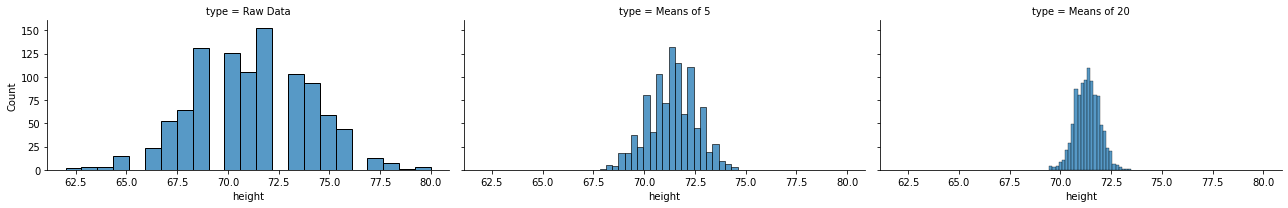

In [4]:
results = pd.concat([sample1000, sample5, sample20])
g = sns.FacetGrid(results, col="type", height=3, aspect=2)
g.map(sns.histplot, "height")

In [5]:
# Compare the standard errors
ic(players["Height"].sem())
ic(sample1000["height"].sem())
ic(sample5["height"].sem())
ic(sample20["height"].sem())


ic| players["Height"].sem(): 0.01966277306612156
ic| sample1000["height"].sem(): 0.09058811294097144
ic| sample5["height"].sem(): 0.03703191005555024
ic| sample20["height"].sem(): 0.018806040975632723


0.018806040975632723

### __The Bootstrap__

The method of resampling from a population described above is referred to as *bootstrapping*. Without taking new samples every time, you can still estimate the sampling distribution of a statistic easily and effectively. Draw samples with replacement from the sample itself, and recalculate the statistic or model for each resample. The algorithm for a bootsrap resampling of the mean, for a sample size *n*:

1. Draw a sample value, record it, and then replace it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3 R times.
5. Use the R results to:
    * Calculate their standard deviation (this estimates sample mean standard error).
    * Produce a histogram or boxplot.
    * Find a confidence interval.

> The bootstrap does not compensate for small sample size. It merely lets you know how lots of additional samples would behave when drawn from a population like the original sample.

__*Confidence*__ <br>
The percentage of confidence intervals, constructed in the same way from the same population, that are expectedd to contain the statistic of interest.

__*Interval endpoints*__ <br>
The top and bottom of the confidence interval.

an *x%* confidence interval around a sample estimate should, on average, contain similar sample estimates *x%* of the time, when a similar sampling procedure is done. The algorithm for a bootstrap confidence interval:

1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.


In [17]:
from sklearn.utils import resample

results = []

for nrepeat in range(1000):
    sample = resample(players["Height"])
    results.append(sample.mean())

results = pd.Series(results)
print("Bootstrap statistics:")
print(f"original: {players['Height'].mean()}")
print(f"bias: {results.mean() - players['Height'].mean()}")
print(f"std. error: {results.std()}")


Bootstrap statistics:
original: 71.3612533729831
bias: -0.0005907814306596038
std. error: 0.020097846919745952


In [20]:
import numpy as np
import scipy.stats as st

# Sample data. When sample data is less than 30 you can just use t-distribution
sample_data = players["Height"].sample(20)

st.t.interval(alpha=0.95, df=len(sample_data)-1, loc=np.mean(sample_data), scale=st.sem(sample_data))

(69.75123613957668, 72.44876386042331)

In [21]:
np.random.seed(0)
sample_data = players["Height"].sample(1500)

st.norm.interval(alpha=0.95, loc=np.mean(sample_data), scale=st.sem(sample_data))

(71.27549246380049, 71.53917420286616)

### __Normal Distribution__

__*Error*__ <br>
The difference between a data point and a predicted or average value.

__*Standardize*__ <br>
Subtract the mean and divide by the standard deviation.

__*z-score*__ <br>
The result of standardizing the individual data point.

__*Standard normal*__ <br>
A normal distribution with mean = 0 and standard deviation = 1.

_*QQ-Plot*__ <br>
A plot to visualize how close a sample distribution is to a specified distribution (*eg.* the normal distribution).



In normal distribution, 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations.

> Most of the variables used in typical data science project are __not__ notrmally distributed. The utility of the normal distribution derives from the fact that many statistics *are* normally distributed in their sampling distribution. Assumptions of normality are generally last resort.



<p align=center>
<img src="Normal Distribution.jpg" alt="Normal Distribution" width="300px"></p>

A *standard normal distribution* is one where the units on the x-axis are expressed in therms of standard deviations away from the mean. The *normalization* / *standardization* is done by subtracting the mean and then divide by the standard deviation. This is called the *z-score*

A *QQ-Plot* depicts how close a sample is to the specified distribution - this case, normal distribution. if the points roughly fall on the diagonal line, the sample distribution can be considered close to normal.

<p align=center>
<img src="QQ Plot.jpg" alt="QQ-Plot" width=300px></p>

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

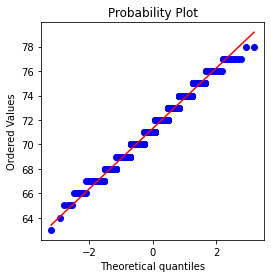

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = players["Height"].sample(1000)
st.probplot(norm_sample, plot=ax)

### __Long-Tailed Distribution__

__*Tail*__ <br>
The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.

__*Skew*__ <br>
Where one tail of a distribution is longer than the other.

Normal distribution is useful and appropriate for distribution of errors and sample statistics, it typically does not characterize the distribution of raw data.

<p align=center>
<img src="QQ Plot not Normal.jpg" alt="Not Normal" width=300px></p>

The data are not normally distributed. We are much likely to observe extreme values than would be expected if data had a normal distribution. Points within one standard deviation of the mean are close to the line (common phenomenon - "normal in the middle").

### __Student's t-Distribution__

A normal distribution that is thicker and longer in the tails.

__*Degrees of Freedom*__ <br>
A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and number of groups.

A number of different statistics cna be compared, after standardization, to the t-distribution to estimate the confidence intervals. With a sample size of $n$, and a sample mean of $\overline{x}$. If $s$ is the sample standard deviation, the 90% confidence interval is:

$$\overline{x} \pm t_{n-1}(0.05)\cdot\frac{s}{\sqrt{n}}$$

The $t$ value above refers to the t-statistic with $n-1$ degrees of freedom, that chops off 5% of the t-distribution at either end.

The t-distribution has been used as a reference for the distribution of a sample mean, the difference between two sample means, regression parameters, and other statistics.

### __Binomial Distribution__

__*Trial*__ <br>
An event with a discrete outcome.

__*Success*__ <br>
The outcome of interest for a trial. *Synonym:* "1"

__*Binomial*__ <br>
Having two outcomes.

__*Binomial trial*__ <br>
A trial with two outcomes. *Synonym:* Bernoulli trial

__*Binomial distribution*__ <br>
Distribution of number of successes in *x* trials. *Synonym:* Bernoulli distribution

Through this distribution, we are often interested in the probability of $x$ in $n$ trials.

The mean of a binomial distribution is $n \times p$. Think of it as the expected number of successes in $n$ trials, for success probability = $p$.

The variance is $n \times p(1 - p)$.

With large sample size, and provided $p$ is not too close to 0 or 1, the binomial distribution can be approximated by the normal distribution.

### __Chi-Square Distribution__

The statistic that measures the extent to which results depart from the null expectation of independence is the chi-square statistic.
The chi-square distribution is the distribution of this statistic under repeated resampled draws from the null model.
A low chi-square value fora set of counts indicates that they closely follow the expected distribution.

### __F-distribution__

Here, we deal with measured continuous values (rather than counts in chi-square distribution). F-statistic measures the extent to which differences among group means are greater than we might expect under normal random variation. So, it is the ratio of the variability among the group means to the variability within each group. This comparison is called *analysis of variance*.

The F statistic is also used in linear regression to compare the variation accounted for by the regression model to the overall variation in the data.

### __Poisson and Related Distributions__

__*Lambda*__ <br>
The rate (per unit of time or space) at which events occur.

__*Poisson distribution*__ <br>
The frequency distribution of the number of events in sampled units of time or space.

__*Exponential distribution*__ <br>
The frequency distribution of the time or distance from one event to the next event.

__*Wibull distribution*__ <br>
A generalized version of the exponential distribution in which the event rate is allowed to shift over time.

Exponential distribution can also model the distribution of the time between events. Used in engineering to model time to failure. 

A key assumption in poisson and exponential distribution is that the rate, $\lambda$ remains constant. This is rarely reasonable: e.g. traffic on roads varies by time of day and day of week.

If there is some data but not enough to provide a precise, reliable estimate of the rate, a goodness-of-fit test can be applied to various rates to determine how well they fit the observed data. Can be useful to estimate rate of failure, where prior failure data is not enough.

If the event rate changes over time, the exponential (or Poisson) distributions are no longer useful. This is often the case for mechanical failure; the risk of failure increases as time goes by.
The *Weibull* distribution allows the event rate to change, specified by a *shape parameter* $\beta$.
If $\beta > 1$, the probability of an event increases over time.
If $\beta < 1$, the probability decreases. 
Because the Weibull distribution is used with time-to-failure analyses instead of event rate, the second parameter is expressed in terms of characteristic life, rather than in terms of the rate of events per interval; $\eta$ is used to denote (also called the *scale* parameter).

The estimation task now includes $\beta$ and $\eta$; software is used to model the data and yield an estimate of the best-fitting Weibull distribution. 